#回帰木（特徴量：RM、max_depth=1）の予測値の可視化

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install graphviz==0.20.1
# !pip install scikit-learn==1.2.2

In [ ]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import mean_squared_error

In [ ]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(graphviz.__version__)
print(sklearn.__version__) 

1.5.3
1.22.4
3.7.1
0.20.1
1.2.2


In [ ]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df.head()

In [ ]:
# 特徴量と目的変数の設定
X_train = df.loc[:99, ['RM']] # 特徴量に100件のRM（平均部屋数）を設定
y_train = df.loc[:99, 'MEDV'] # 正解値に100件のMEDV（住宅価格）を設定
print('X_train:', X_train[:3])
print('y_train:', y_train[:3])

X_train:       RM
0  6.575
1  6.421
2  7.185
y_train: 0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64


In [ ]:
# モデルの学習
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion='squared_error', max_depth=1, min_samples_leaf=1, random_state=0) # 回帰木モデル
model.fit(X_train, y_train)
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
# 予測値
model.predict(X_train)

array([20.72386364, 20.72386364, 33.93333333, 33.93333333, 33.93333333,
       20.72386364, 20.72386364, 20.72386364, 20.72386364, 20.72386364,
       20.72386364, 20.72386364, 20.72386364, 20.72386364, 20.72386364,
       20.72386364, 20.72386364, 20.72386364, 20.72386364, 20.72386364,
       20.72386364, 20.72386364, 20.72386364, 20.72386364, 20.72386364,
       20.72386364, 20.72386364, 20.72386364, 20.72386364, 20.72386364,
       20.72386364, 20.72386364, 20.72386364, 20.72386364, 20.72386364,
       20.72386364, 20.72386364, 20.72386364, 20.72386364, 20.72386364,
       33.93333333, 20.72386364, 20.72386364, 20.72386364, 20.72386364,
       20.72386364, 20.72386364, 20.72386364, 20.72386364, 20.72386364,
       20.72386364, 20.72386364, 20.72386364, 20.72386364, 20.72386364,
       33.93333333, 20.72386364, 33.93333333, 20.72386364, 20.72386364,
       20.72386364, 20.72386364, 20.72386364, 20.72386364, 33.93333333,
       20.72386364, 20.72386364, 20.72386364, 20.72386364, 20.72

In [ ]:
# 学習データの予測と評価
y_train_pred = model.predict(X_train)
print('MSE train: %.4f' % (mean_squared_error(y_train, y_train_pred)))

MSE train: 16.3633


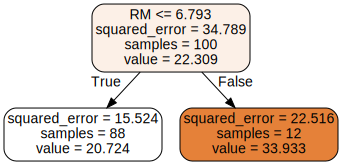

In [ ]:
# 木の可視化
from sklearn import tree

dot_data = tree.export_graphviz(model, out_file=None, rounded=True, feature_names=['RM'], filled=True)
graphviz.Source(dot_data, format='png')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


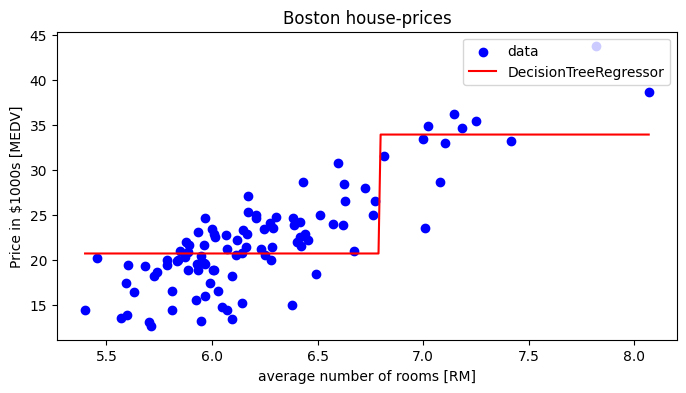

In [ ]:
# データと予測値の可視化
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
X = X_train.values.flatten() # numpy配列に変換し、1次元配列に変換
y = y_train.values # numpy配列に変換

# Xの最小値から最大値まで0.01刻みのX_pltを作成し、2次元配列に変換
X_plt = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]
y_pred = model.predict(X_plt) # 住宅価格を予測

# 学習データ(平均部屋数と住宅価格)の散布図と予測値のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red', label='DecisionTreeRegressor')
plt.ylabel('Price in $1000s [MEDV]')
plt.xlabel('average number of rooms [RM]')
plt.title('Boston house-prices')
plt.legend(loc='upper right')
plt.show()

#分割点と予測値の検証

In [ ]:
# データのソート
X_train = X_train.sort_values('RM') # 特徴量RMの分割点計算前にソート
y_train = y_train[X_train.index] # 正解もソート

X_train = X_train.values.flatten() # numpy化して2次元配列→1次元配列
y_train = y_train.values # numpy化

print(X_train[:10])
print(y_train[:10])

[5.399 5.456 5.57  5.594 5.599 5.602 5.631 5.682 5.701 5.713]
[14.4 20.2 13.6 17.4 13.9 19.4 16.5 19.3 13.1 12.7]


In [ ]:
# 分割点の計算
index =[]
loss =[]
# 分割点ごとの予測値,SSE,MSEを計算
for i in range(1, len(X_train)):
    X_left = np.array(X_train[:i])
    X_right = np.array(X_train[i:])
    y_left = np.array(y_train[:i])
    y_right = np.array(y_train[i:])
    # 分割点のインデックス
    print('*****')
    print('index', i)
    index.append(i)
    # 左右の分割
    print('X_left:', X_left)
    print('X_right:', X_right)
    print('')
    # 予測値の計算
    print('y_pred_left:', np.mean(y_left))
    print('y_pred_right:', np.mean(y_right))
    print('')
    # SSEの計算
    y_error_left = y_left - np.mean(y_left)
    y_error_right = y_right - np.mean(y_right)
    SSE = np.sum(y_error_left * y_error_left) + np.sum(y_error_right * y_error_right)
    print('SSE:', SSE)
    loss.append(SSE)
    # MSEの計算
    MSE_left = 1/len(y_left) * np.sum(y_error_left * y_error_left)
    MSE_right = 1/len(y_right) * np.sum(y_error_right * y_error_right)
    print('MSE_left:', MSE_left)
    print('MSE_right:', MSE_right)
    print('')

*****
index 1
X_left: [5.399]
X_right: [5.456 5.57  5.594 5.599 5.602 5.631 5.682 5.701 5.713 5.727 5.741 5.786
 5.787 5.813 5.813 5.834 5.841 5.85  5.874 5.878 5.885 5.888 5.889 5.924
 5.927 5.933 5.935 5.949 5.95  5.961 5.963 5.965 5.966 5.966 5.99  5.998
 6.004 6.009 6.012 6.015 6.03  6.047 6.065 6.069 6.072 6.096 6.096 6.115
 6.121 6.14  6.142 6.145 6.163 6.167 6.169 6.172 6.211 6.211 6.232 6.245
 6.249 6.273 6.279 6.286 6.29  6.302 6.377 6.383 6.389 6.405 6.417 6.417
 6.421 6.43  6.442 6.456 6.495 6.511 6.575 6.595 6.619 6.625 6.63  6.674
 6.727 6.762 6.77  6.816 6.998 7.007 7.024 7.079 7.104 7.147 7.185 7.249
 7.416 7.82  8.069]

y_pred_left: 14.4
y_pred_right: 22.388888888888886

SSE: 3415.7577777777783
MSE_left: 0.0
MSE_right: 34.50260381593716

*****
index 2
X_left: [5.399 5.456]
X_right: [5.57  5.594 5.599 5.602 5.631 5.682 5.701 5.713 5.727 5.741 5.786 5.787
 5.813 5.813 5.834 5.841 5.85  5.874 5.878 5.885 5.888 5.889 5.924 5.927
 5.933 5.935 5.949 5.95  5.961 5.963 5.965 5.

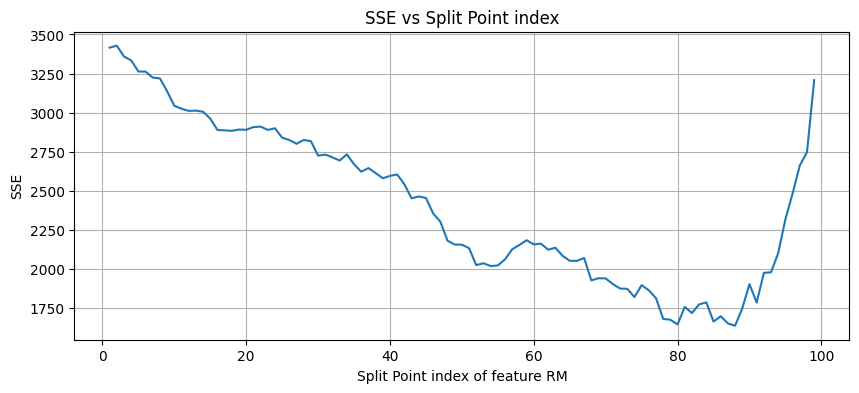

In [ ]:
# 分割点とSSEの可視化
X_plt = np.array(index)[:, np.newaxis] # 1次元配列→2次元配列
plt.figure(figsize=(10, 4)) #プロットのサイズ指定
plt.plot(X_plt,loss)
plt.xlabel('Split Point index of feature RM')
plt.ylabel('SSE')
plt.title('SSE vs Split Point index')
plt.grid()
plt.show()